In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, glob
from tqdm import tqdm
from censai.data.lenses_tng import decode_all, decode_train, decode_physical_model_info
from astropy.visualization import ImageNormalize, LogStretch

In [25]:
datapath = "/home/aadam/scratch/Censai/data/lenses512_k128_TNG100/"
files = glob.glob(os.path.join(datapath, "*.tfrecords"))
files = tf.data.Dataset.from_tensor_slices(files)
dataset = files.interleave(lambda x: tf.data.TFRecordDataset(x, compression_type="GZIP"), block_length=1, num_parallel_calls=tf.data.AUTOTUNE).map(decode_all)
# data = tf.data.TFRecordDataset(filenames, compression_type="GZIP").map(decode_all)
# data = tf.data.TFRecordDataset(files, compression_type="GZIP").map(decode_physical_model_info)

In [26]:
# for x in data:
#     print(x)
#     break

{'image fov': <tf.Tensor: shape=(), dtype=float32, numpy=20.0>, 'kappa fov': <tf.Tensor: shape=(), dtype=float32, numpy=17.425909>, 'source fov': <tf.Tensor: shape=(), dtype=float32, numpy=3.0>, 'src pixels': <tf.Tensor: shape=(), dtype=int64, numpy=128>, 'kappa pixels': <tf.Tensor: shape=(), dtype=int64, numpy=128>, 'pixels': <tf.Tensor: shape=(), dtype=int64, numpy=512>, 'noise rms': <tf.Tensor: shape=(), dtype=float32, numpy=0.006>, 'psf sigma': <tf.Tensor: shape=(), dtype=float32, numpy=0.06>}


In [ ]:
kappas = []
galaxies = []
lenses = []
einstein_radius = []
einstein_radius_init = []
rescalings = []
kappa_ids = []
kappa_max = []
kappa_min = []
kappa_max_before_rescaling = []
kappa_var = []
kappa_mean = []
i = 0
for example in tqdm(dataset):
    kappa_ids.append(example['kappa id'])
    einstein_radius.append(example['Einstein radius'].numpy())
    einstein_radius_init.append(example['Einstein radius before rescaling'].numpy())
    rescalings.append(example['rescaling factor'])
    kappa_max.append(np.max(example['kappa']))
    kappa_min.append(np.min(example['kappa']))
    kappa_max_before_rescaling.append(np.max(example['kappa'])/example['rescaling factor'].numpy())
    kappa_var.append(np.std(example['kappa']))
    kappa_mean.append(np.mean(example['kappa']))
    kappas.append(example['kappa'])
    galaxies.append(example['source'])
    lenses.append(example['lens'])
    i += 1
    if i == 10000:
        break

9999it [01:20, 124.98it/s]


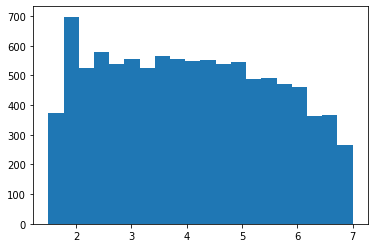

In [ ]:
plt.hist(einstein_radius, bins=20);

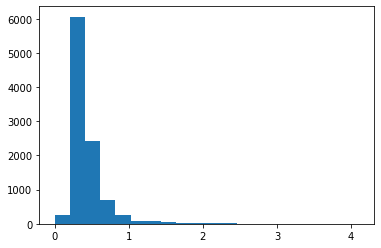

In [ ]:
plt.hist(einstein_radius_init, bins=20);

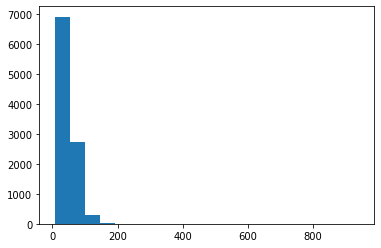

In [ ]:
plt.hist(kappa_max, bins=20);
# plt.xscale("log")

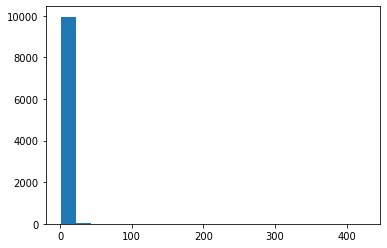

In [ ]:
plt.hist(kappa_max_before_rescaling, bins=20);

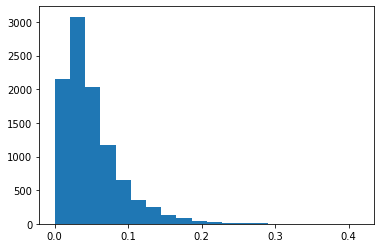

In [ ]:
plt.hist(kappa_min, bins=20);

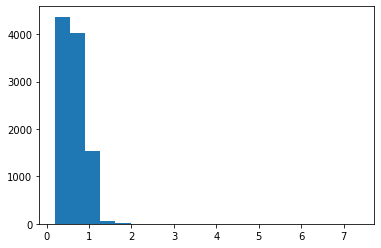

In [ ]:
plt.hist(kappa_var, bins=20);
# plt.xscale("log")

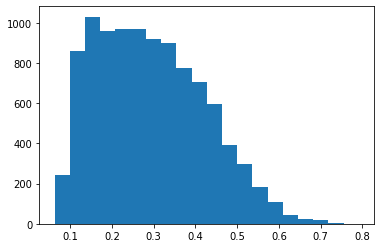

In [ ]:
plt.hist(kappa_mean, bins=20);

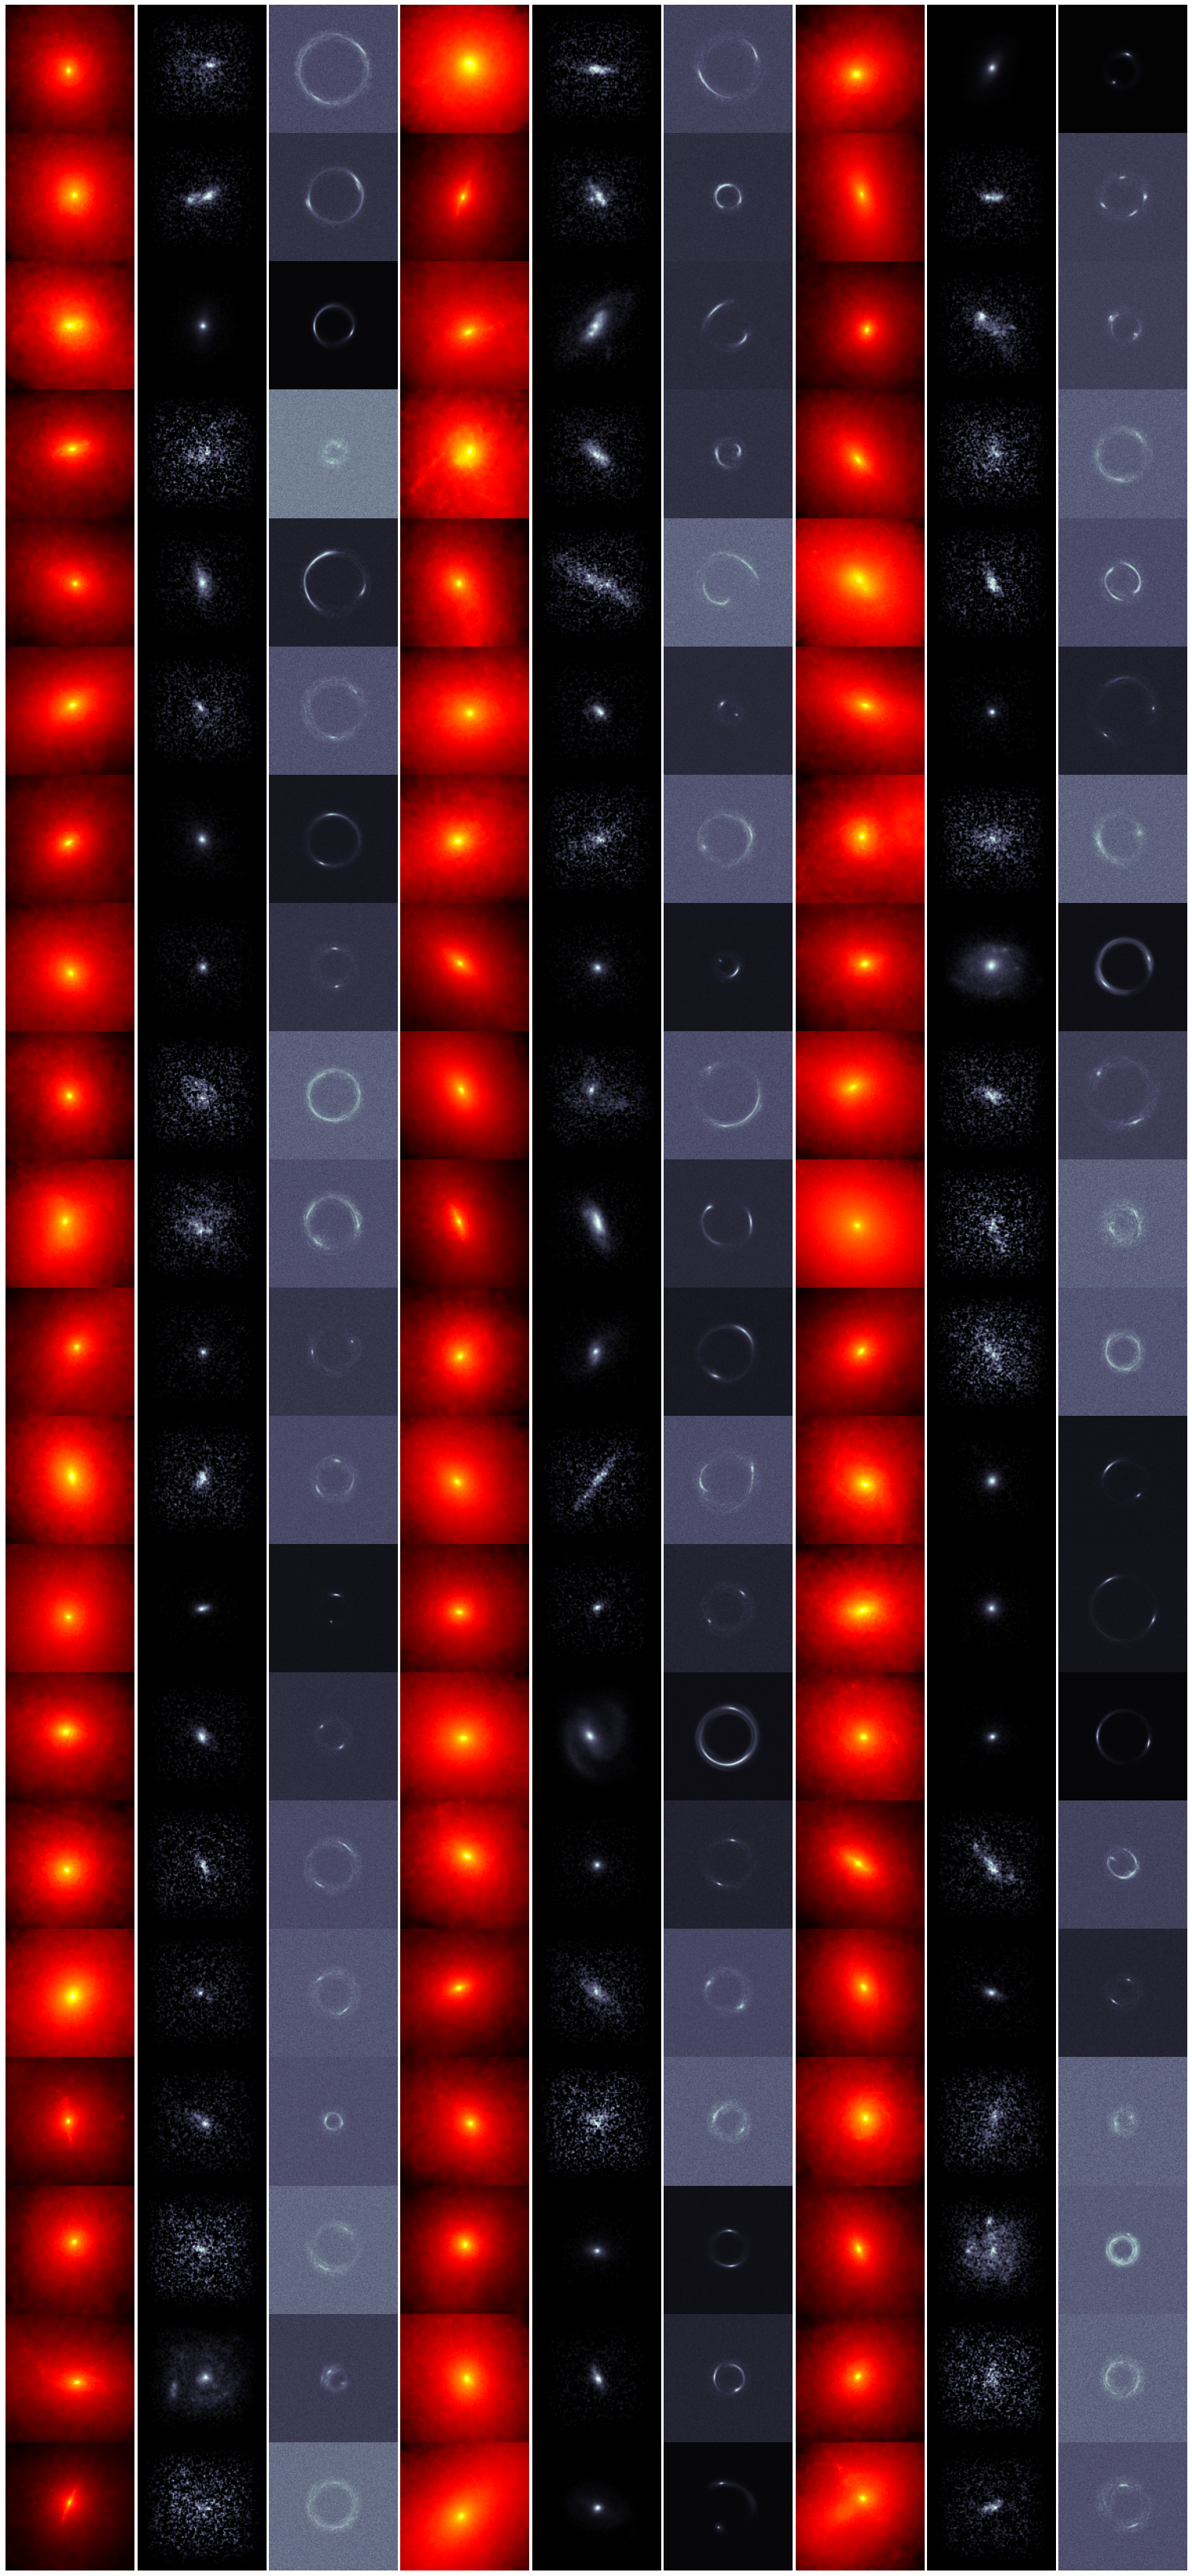

In [14]:
fig, axs = plt.subplots(20, 9, figsize=(27, 60))
start = 2051
for i in range(0, 20):
    axs[i, 0].imshow(kappas[i+start][..., 0], cmap="hot", norm=ImageNormalize(stretch=LogStretch()))
    axs[i, 1].imshow(galaxies[i+start][..., 0], cmap="bone")
    axs[i, 2].imshow(lenses[i+start][..., 0], cmap="bone")
    for j in range(3):
        axs[i, j].axis("off")
        
for i in range(0, 20):
    axs[i, 3].imshow(kappas[i+start+20][..., 0], cmap="hot", norm=ImageNormalize(stretch=LogStretch()))
    axs[i, 4].imshow(galaxies[i+start+20][..., 0], cmap="bone")
    axs[i, 5].imshow(lenses[i+start+20][..., 0], cmap="bone")
    for j in range(3, 6):
        axs[i, j].axis("off")

for i in range(0, 20):
    axs[i, 6].imshow(kappas[i+start+40][..., 0], cmap="hot", norm=ImageNormalize(stretch=LogStretch()))
    axs[i, 7].imshow(galaxies[i+start+40][..., 0], cmap="bone")
    axs[i, 8].imshow(lenses[i+start+40][..., 0], cmap="bone")
    for j in range(6, 9):
        axs[i, j].axis("off")

plt.subplots_adjust(wspace=0, hspace=0)

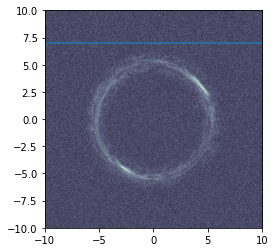

In [30]:
plt.imshow(lenses[2051][..., 0], cmap="bone", extent=[-10, 10, -10, 10])
plt.axhline(7)

In [17]:
einstein_radius[2051]

6.9998355

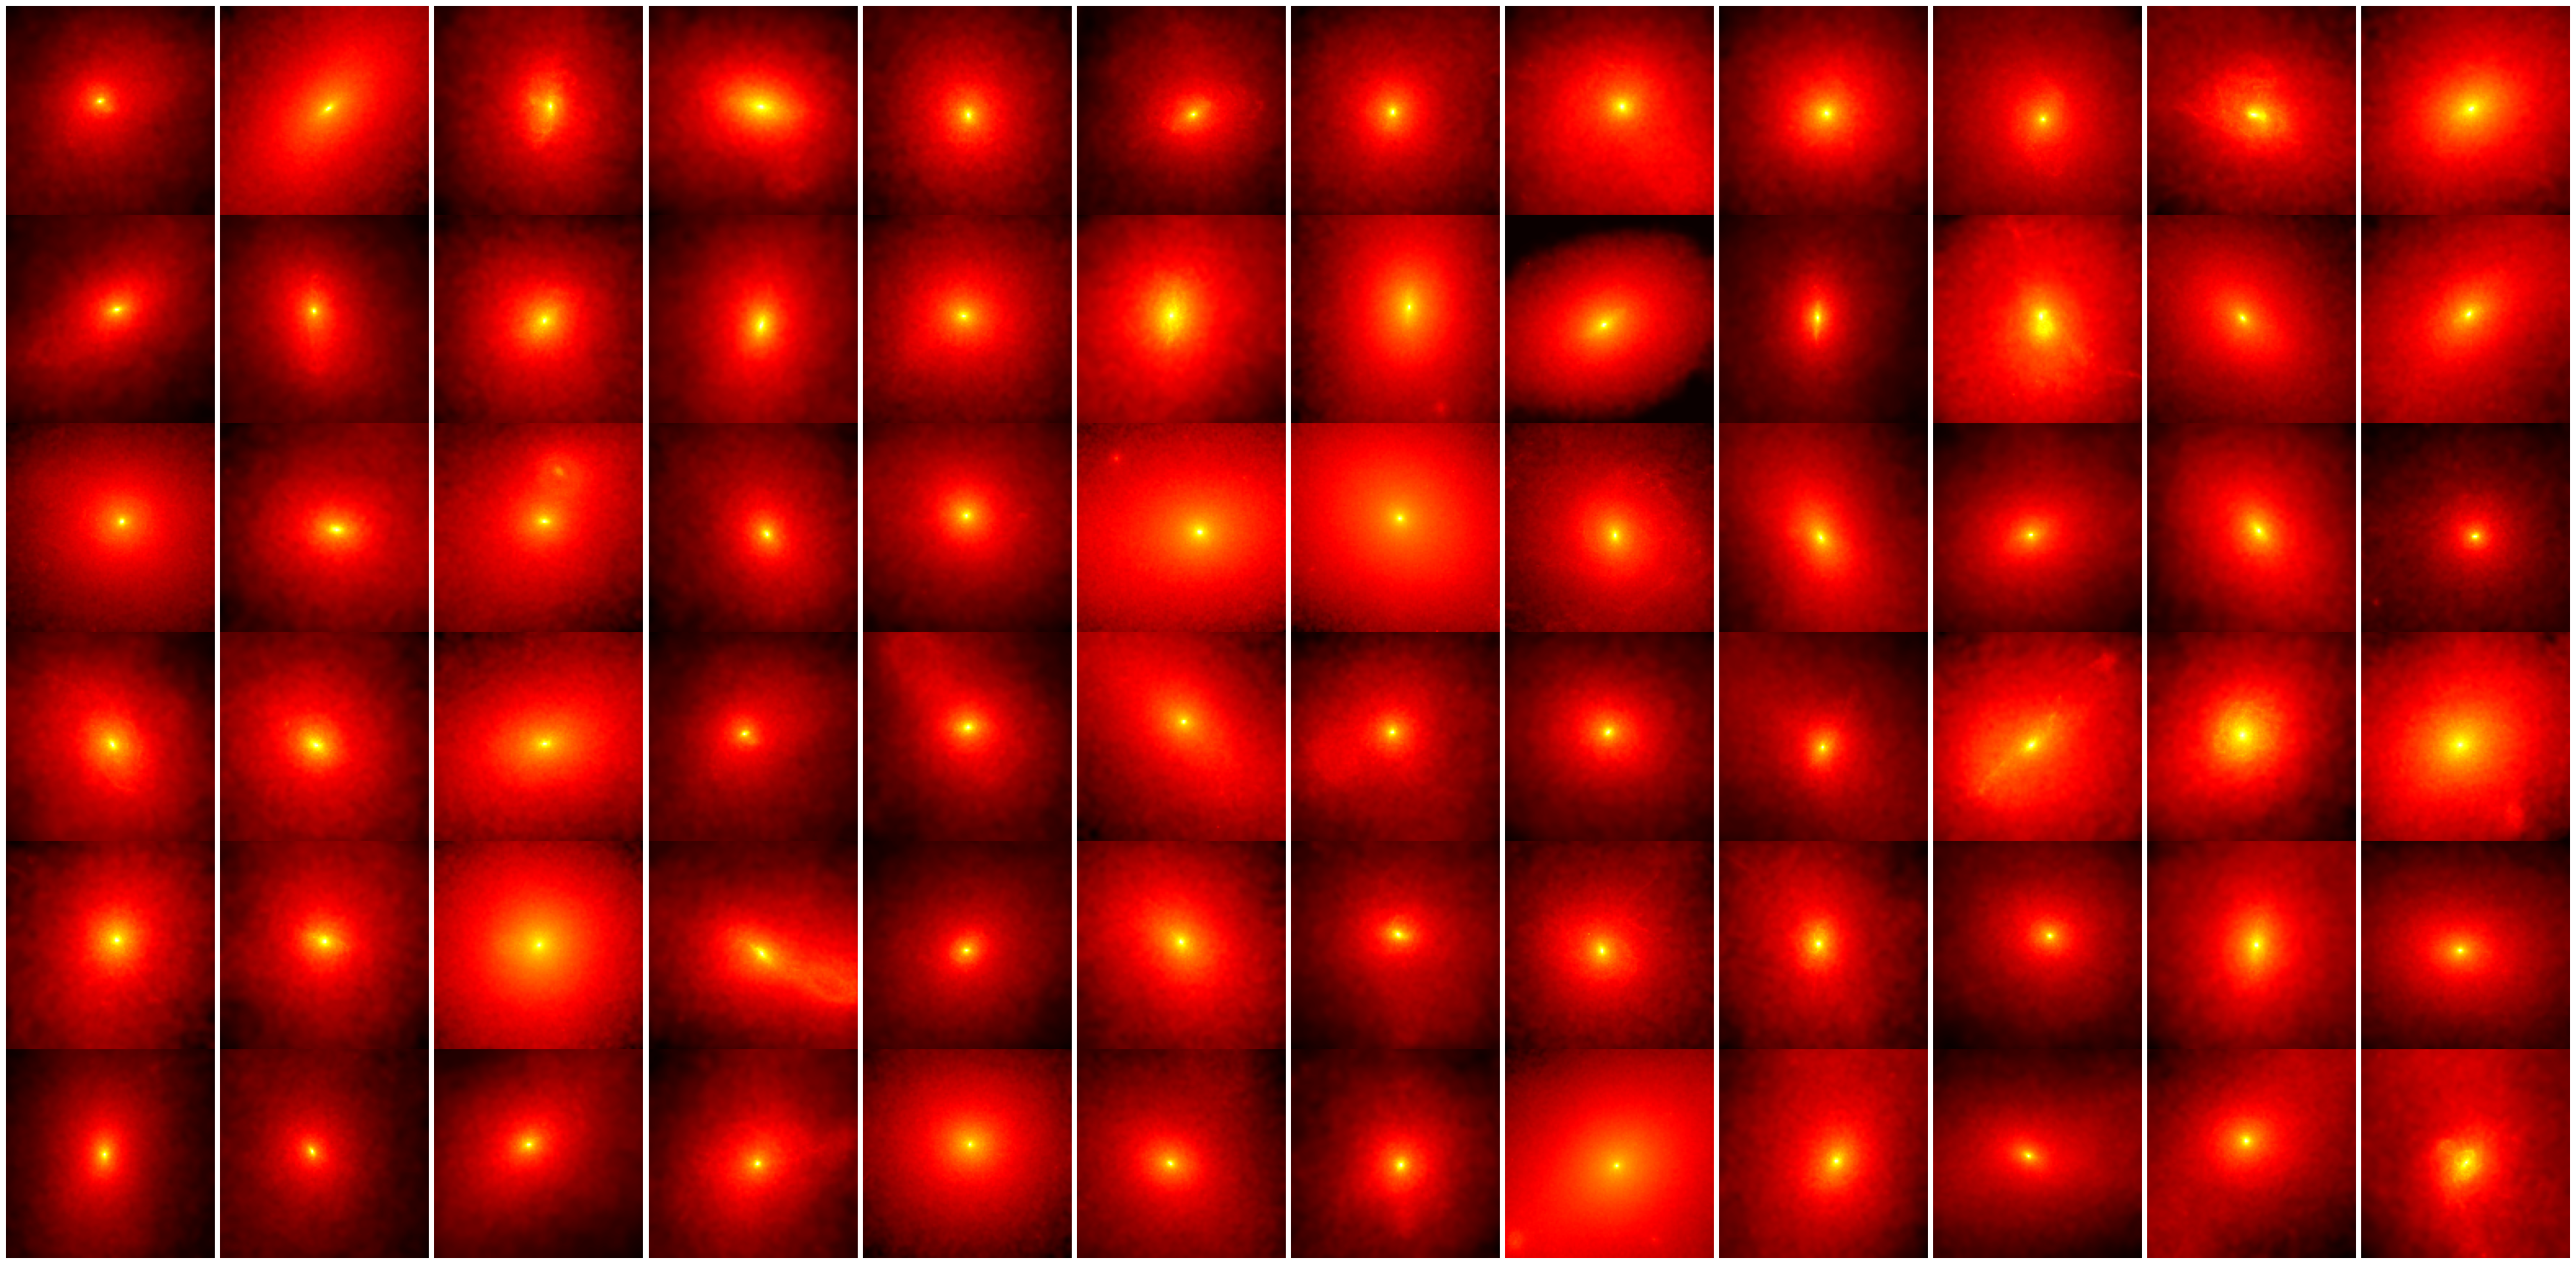

In [ ]:
fig, axs = plt.subplots(6, 12, figsize=(54, 27))
start = 5239
ell = 0
for i in range(6):
    for j in range(12):
        axs[i, j].imshow(kappas[ell+start][..., 0], cmap="hot", norm=ImageNormalize(stretch=LogStretch()))
        axs[i, j].axis("off")
        ell += 1
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("KappaTNG100.png")